In [ ]:
# Packages used in this chapter
# To check for installed packages in V1.0 we now need to use the PKG API

using Pkg
ipks = Pkg.installed()
pkgs = ["BenchmarkTools","Match","PyPlot"]
for p in pkgs
    !haskey(ipks,p) && Pkg.add(p)
end

# We can define these here as as required
using BenchmarkTools, Match, PyPlot

# We need these as some functions have moved from Base to Stdlib
#
using Printf, LinearAlgebra, StaticArrays

## Chapter 3

### Collatz conjecture 

The Hailstone sequence of numbers can be generated from a starting positive integer, n by:

- If n is 1 then the sequence ends.
- If n is even then the next n of the sequence = n/2
- If n is odd then the next n of the sequence = (3 * n) + 1

The Collatz conjecture is that the hailstone sequence for any starting number always terminates.

In [1]:
function hailstone(n)
   k = 1
   a = [n]
   while n > 1 
      n = (n % 2 == 0) ? n >> 1 : 3n + 1 
      push!(a,n)
      k += 1
   end
   a
end

hailstone (generic function with 1 method)

In [2]:
hailstone(17)

13-element Array{Int64,1}:
 17
 52
 26
 13
 40
 20
 10
  5
 16
  8
  4
  2
  1

---

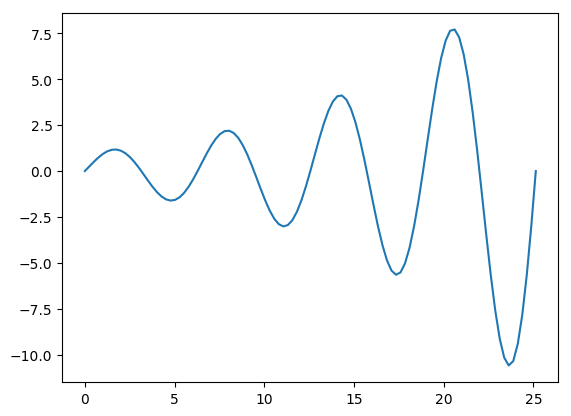

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1318a0590>

In [3]:
using PyPlot

f(x, p = 0.0) = exp(p*x)*sin(x);
t = range(0.0,stop=8.0*π,length=101);
w = zeros(length(t));
for i = 1:length(w) w[i] = f(t[i], 0.1) end

plot(t, w)

---

### Pattern Matching

In [ ]:
using Match

In [ ]:
allodds(x) = @match x begin
    m::Int, if iseven(m) || (m < 3) end        => "Not a valid choice"
    n::Int, if n == 3 || n == 5 || n == 7 end  => "$x is prime"
    _  =>  "By induction all numbers are prime"
end

In [ ]:
allodds(3)

In [ ]:
allodds(6)

In [ ]:
allodds(9)

## Solve Queens problem

In [ ]:
struct Queen
    x::Int
    y::Int
end

In [ ]:
qhorz(qa, qb) = qa.x == qb.x;
qvert(qa, qb) = qa.y == qb.y;
qdiag(qa, qb) = abs(qa.x - qb.x) == abs(qa.y - qb.y);

qhvd(qa, qb) = qhorz(qa, qb) || qvert(qa, qb) || qdiag(qa, qb);
qany(testq, qs) = any(q -> qhvd(testq, q), qs);

In [ ]:
function qsolve(nsqsx, nsqsy, nqs, presqs = ())
    nqs == 0 && return presqs
    for xsq in 1:nsqsx
        for ysq in 1:nsqsy
            testq = Queen(xsq, ysq)
            if !qany(testq, presqs)
                tryqs = (presqs..., testq)
                maybe = qsolve(nsqsx, nsqsy, nqs - 1, tryqs)
                maybe !== nothing && return maybe
            end
        end
    end
    return nothing
end

qsolve(nqs) = qsolve(nqs, nqs, nqs)

In [ ]:
qsolve(8)

---

In [ ]:
module Vehicles

export Contact, Vehicle, Car, Bike, Yacht, Powerboat, Boat
export Ford, BMW, VW, Scooter, MotorBike, Speedboat 

const KNOTS_TO_MPH = 1.151
       
struct Contact
    name::String
    email::String
    phone::String
end
                             
abstract type Vehicle end

abstract type Car <: Vehicle end
abstract type Bike <: Vehicle  end
abstract type Boat <: Vehicle end

abstract type Powerboat <: Boat end
       
struct Ford <: Car
    owner::Contact
    make::String
    fuel::String
    color::String
    engine_cc::Int64
    speed_mph::Float64
    function Ford(owner, make, engine_cc,speed_mph)
        new(owner,make,"Petrol","Black",engine_cc,speed_mph)
     end
end
       
struct BMW <: Car
    owner::Contact
    make::String
    fuel::String
    color::String
    engine_cc::Int64
    speed_mph::Float64
    function BMW(owner,make,engine_cc,speed_mph)
        new(owner,make,"Petrol","Blue",engine_cc,speed_mph)
   end
end
       
struct VW <: Car
    owner::Contact
    make::String
    fuel::String
    color::String
    engine_cc::Int64
    speed_mph::Float64
end

struct MotorBike <: Bike
    owner::Contact
    make::String
    engine_cc::Int64
    speed_mph::Float64
end
       
struct Scooter <: Bike
    owner::Contact
    make::String
    engine_cc::Int64
    speed_mph::Float64
end

mutable struct Yacht <: Boat
    owner::Contact
    make::String
    length_m::Float64
end
              
mutable struct Speedboat <: Powerboat
    owner::Contact
    make::String
    fuel::String
    engine_cc::Int64
    speed_knots::Float64
    length_m::Float64
end

function is_quicker(a::VW, b::BMW)
   if (a.speed_mph == b.speed_mph) 
      return nothing
    else
      return(a.speed_mph > b.speed_mph ? a : b)
     end
end

function is_quicker(a::Speedboat, b::Scooter)
   a_mph = KNOTS_TO_MPH * a.speed_knots
   if (a_mph == b.speed_mph) 
       return nothing
    else
       return(a_mph > b.speed_mph ? a : b)
    end
end

function is_longer(a::Yacht, b::Speedboat)
   if (a.length_m == b.length_m) 
       return nothing
    else
       return(a.length > b.length_m ? a : b)
    end
end

is_quicker(a::BMW, b::VW) = is_quicker(b,a)
is_quicker(a::Scooter, b::Speedboat) = is_quicker(b,a)
is_longer(a::Speedboat, b::Yacht) = is_longer(b,a)

end

In [ ]:
using Main.Vehicles;

malcolm = Contact("Malcolm","malcolm@abc.net","07777555999");
myCar = Ford(malcolm, "Model T", 1000, 50.0);
myBike = Scooter(malcolm, "Vespa", 125, 35.0);

james = Contact("James","james@abc.net","07777666888");
jmCar = BMW(james,"Series 500", 3200, 125.0);
jmBoat = Yacht(james,"Oceanis 44",14.6);
jmBike = MotorBike(james, "Harley", 850, 120.0);

david = Contact("David","dave@abc.net","07777222444");
dvCar = VW(david,"Golf", "diesel", "red", 1800, 85.0);
dvBoat = Speedboat(david,"Sealine","petrol", 600, 45.0, 8.2);

In [ ]:
myCar.owner = david

In [ ]:
dvBoat.owner = malcolm

In [ ]:
s = [myCar, jmCar, dvCar]
for c in s
    who = c.owner.name
    model = c.make
    println("$who has a $model car")
end

In [ ]:
# Note that Malcolm now owns Dave's boat
#
s =[dvCar, dvBoat]  
for c in s
    who = c.owner.name
    model = c.make
    println("$who has a $model vehicle")
end

In [ ]:
println("James owns these vehicles: ")
s = [jmCar, jmBike, jmBoat] 
for c in s
    println("....\t$(c.make)")
end

In [ ]:
# Make this mutable as I might change where I live
#
mutable struct Address
  name::String
  street::String
  city::String
  country::String
  postcode::String
end

In [ ]:
postal = Address("Malcolm Sherrington","1 Main Street", "London", "UK", "WC2N 9ZZ");

In [ ]:
const Owner = Union{Contact, Address}

In [ ]:
struct Skiff <: Boat
   owner::Owner
   make::String
   length_m::Float64
end


In [ ]:
y1 = Skiff(malcolm,"Moody 36", 11.02)

In [ ]:
y2 = Skiff(postal,"Dufour 44", 13.47)

In [ ]:
@assert y1.length_m < y2.length_m

---

---

### 3D vectors

---

In [ ]:
# This module uses Float64 components but could use a parameterised type {T}
#
module V3D

# import Base.+, Base.*, Base./, Base.==, Base.<, Base.>
#
import Base: +, *, /, ==, <, >, zero, one
import LinearAlgebra: norm, dot

export Vec3, norm, dist, zero, one

struct Vec3
    x::Float64
    y::Float64
    z::Float64
end

(+)(a::Vec3, b::Vec3) = Vec3(a.x+b.x, a.y+b.y, a.z+b.z)
(*)(p::Vec3, s::Real) = Vec3(p.x*s, p.y*s, p.z*s)
(*)(s::Real, p::Vec3) = p*s
(/)(p::Vec3, s::Real) = (1.0/s)*p

(==)(a::Vec3, b::Vec3) = (a.x==b.x)&&(a.y==b.y)&&(a.z==b.z) ? true : false;

dot(a::Vec3, b::Vec3) = a.x*b.x + a.y*b.y + a.z*b.z;
norm(a::Vec3) = sqrt(dot(a,a));

zero(a::Vec3) = Vec3(0.0,0.0,0.0);
one(a::Vec3)  = Vec3(1.0,1.0,1.0);

(<)(a::Vec3, b::Vec3) = norm(a) < norm(b) ? true : false;
(>)(a::Vec3, b::Vec3) = norm(a) > norm(b) ? true : false;

dist(a::Vec3, b::Vec3) = sqrt((a.x-b.x)*(a.x-b.x) + (a.y-b.y)*(a.y-b.y) + (a.z-b.z)*(a.z-b.z))

end

In [ ]:
using Main.V3D
using Printf

v1 = Vec3(1.2,3.4,5.6);
v2 = Vec3(2.1,4.3,6.5);
@printf "Distance between vectors is %.3f \n" dist(v1,v2)

In [ ]:
vv = [Vec3(rand(),rand(),rand()) for i = 1:1000000];
vs = reshape(vv,1000,1000)

In [ ]:
using LinearAlgebra

dv = map(v -> norm(v), vs)
dw = dv'
ee = eigen(dw)

In [ ]:
k = 0
for i in 1:length(vv)
  if norm(vv[i]) < 1.0 
    global k +=1 
  end
end
@printf "Estimate of PI is %9.5f\n" 6.0*k/length(vv)

In [ ]:
#
# Defining the Vec3 parameterically and the rest of the module is unchanged
# i.e.
#
# immutable Vec3P{T}
#    x::T
#    y::T
#    z::T
# end
#
module V3P
#
# import Base.+, Base.*, Base./, Base.norm, Base.==, Base.<, Base.>
#
import Base: +, *, /, ==, <, >
import LinearAlgebra: norm, dot
export Vec3P, norm, distp

struct Vec3P{T}
    x::T
    y::T
    z::T
end

(+)(a::Vec3P, b::Vec3P) = Vec3P(a.x+b.x, a.y+b.y, a.z+b.z)
(*)(p::Vec3P, s::Real) = Vec3P(p.x*s, p.y*s, p.z*s)
(*)(s::Real, p::Vec3P) = p*s
(/)(p::Vec3P, s::Real) = (1.0/s)*p

(==)(a::Vec3P, b::Vec3P) = (a.x==b.x)&&(a.y==b.y)&&(a.z==b.z) ? true : false;

dot(a::Vec3P, b::Vec3P) = a.x*b.x + a.y*b.y + a.z*b.z;
norm(a::Vec3P) = sqrt(dot(a,a));

(<)(a::Vec3P, b::Vec3P) = norm(a) < norm(b) ? true : false;
(>)(a::Vec3P, b::Vec3P) = norm(a) > norm(b) ? true : false;

distp(a::Vec3P, b::Vec3P) = sqrt((a.x-b.x)*(a.x-b.x) + (a.y-b.y)*(a.y-b.y) + (a.z-b.z)*(a.z-b.z))

end

In [ ]:
using Main.V3P

z1 = Vec3P{Complex}(1+2im,2+3im,3+4im);
z2 = Vec3P{Complex}(3-2im,4-3im,5-4im);
z1 + z2

In [ ]:
zn = norm(z1 + z2)        # => sqrt(116) but IS a complex number.
@assert zn == sqrt(116)

# Notice that the vaule is returned as a complex.
zn

In [ ]:
r1 = Vec3P{Rational}(11//7,13//5,8//17)
r2 = Vec3P{Rational}(17//9,23//15,28//17)
r1 + r2

In [ ]:
# Norm is promoted to a Real as it can not be represented as a Rational
#
norm(r1 + r2)

---

### It is possible to extend the above to an *nD* vector simply using static arrays.

---

In [4]:
module VNX
using StaticArrays

import Base: +, *, /, ==, <, >
import LinearAlgebra: norm, dot
export VecN, norm, distx

struct VecN
    sv::SVector;
end

sizeof(a::VecN) = length(a.sv)
sOK(a::VecN, b::VecN) = 
 (sizeof(a) == sizeof(b)) ? true : throw(BoundsError("Vector of different lengths"));

(+)(a::VecN, b::VecN) = [a.sv[i] + b.sv[i] for i in 1:sizeof(a) if sOK(a,b)]
(*)(x::Real, a::VecN) = [a.sv[i]*x for i in 1:sizeof(a)]
(*)(a::VecN, x::Real) = x*a
(/)(a::VecN, x::Real) = [a.sv[i]/x for i in 1:sizeof(a)]

(==)(a::VecN, b::VecN) = any([(a.sv[i] == b.sv[i]) for i in 1:sizeof(a) if sOK(a,b)])
                            
dot(a::VecN, b::VecN) = sum([a.sv[i]*b.sv[i] for i in 1:sizeof(a) if sOK(a,b)])
norm(a::VecN) = sqrt(dot(a,a));

(<)(a::VecN, b::VecN) = norm(a) < norm(b) ? true : false;
(>)(a::VecN, b::VecN) = norm(a) > norm(b) ? true : false;                                            
                                            
distx(a::VecN, b::VecN) = sum(map(x -> x*x,[a.sv[i]-b.sv[i] for i in 1:sizeof(a) if sOK(a,b)]))

end

Main.VNX

In [6]:
# Generate K 4-vectors
#
using Main.VNX, StaticArrays

K = 10^5; 
vv = Array{VecN}(undef,K);

for j = 1:K
  vv[j] =  VecN(@SVector [rand() for i = 1:4])
end

In [7]:
# Sum up the vectors which lie within the 4-ball
#
s = 0;
for j = 1:K 
  if (norm(vv[j]) < 1.0) s += 1 end
end

In [8]:
# Volume of the unit 4-ball is 2*π*π
# The count is 1/16th of the volume
# 
mypi = sqrt(32*s/K)

3.147011280564466